
# 9.时间序列分析                              


#### 笨办法学 Python 数据分析  / learn data analysis the hard way
- @Author：知行并重


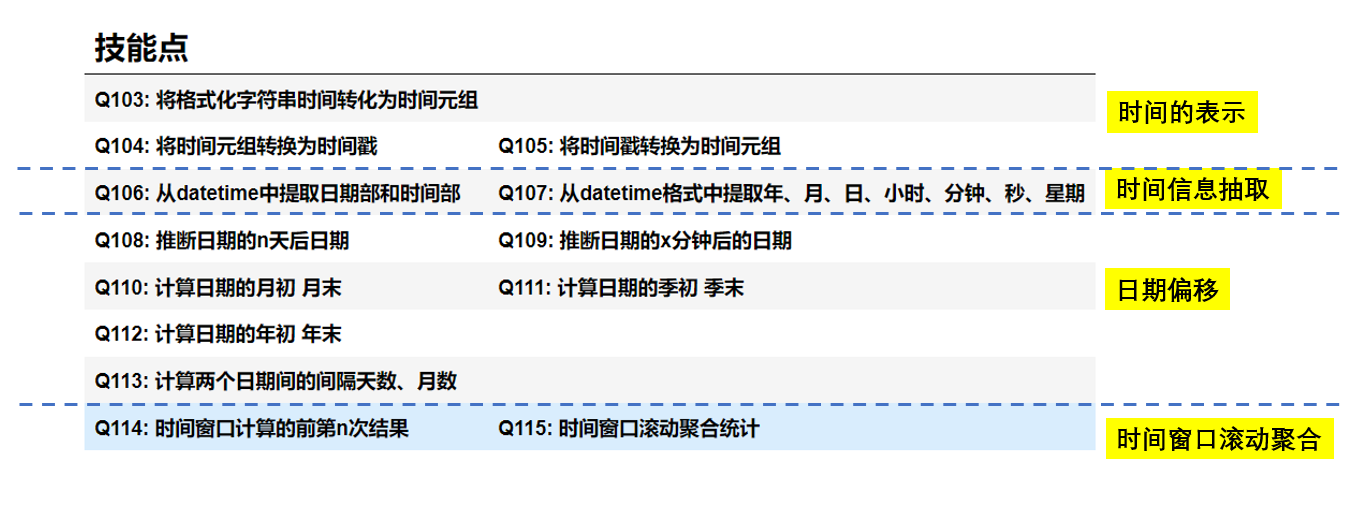

|<h2>技能点</h2> | |
|:-----|:-----|
|**Q103: 将格式化字符串时间转化为时间元组**|
|**Q104: 将时间元组转换为时间戳**|**Q105: 将时间戳转换为时间元组**|
|**Q106: 从datetime中提取日期部和时间部**|**Q107: 从datetime格式中提取年、月、日、小时、分钟、秒、星期**|
|**Q108: 推断日期的n天后日期**|**Q109: 推断日期的x分钟后的日期**|
|**Q110: 计算日期的月初 月末**|**Q111: 计算日期的季初 季末**|
|**Q112: 计算日期的年初 年末**||
|**Q113: 计算两个日期间的间隔天数、月数**||
|**Q114: 时间窗口计算的前第n次结果**|**Q115: 时间窗口滚动聚合统计**|

## 目录
1. **时间的表示**
    - 三种格式间转换
    
2. **时间信息抽取**
    - 年、月、周、日、时、分、秒
    
3. **日期偏移**
    - 过去x天
    - 月初、月末、季末
    - 日期之间间隔
    
4. **时间窗口滚动聚合**
    - 过去x天内聚合

### Step1: 导入必要的库

In [7]:
import pandas as pd #数据分析
import numpy as np #科学计算

from datetime import datetime,timedelta # 时间处理

### 一、数据读取

股票的交易日期，当天的开盘价、最高价、最低价以及收盘价

In [8]:
df = pd.read_csv("../input/share.csv")

print(df.shape)
df.head()

(237, 6)


,ts_code,trade_date,open,high,low,close
0,000001.SZ,20200430,14.02,14.32,13.88,13.93
1,600000.SH,20200430,10.58,10.79,10.56,10.63
2,601328.SH,20200430,5.17,5.21,5.17,5.18
3,000001.SZ,20200429,13.48,14.10,13.45,14.02
4,600000.SH,20200429,10.35,10.61,10.33,10.61


In [10]:
df['ts_code'].value_counts()
df['trade_date'].value_counts().sort_index()

20200102    3
20200103    3
20200106    3
20200107    3
20200108    3
           ..
20200424    3
20200427    3
20200428    3
20200429    3
20200430    3
Name: trade_date, Length: 79, dtype: int64

## 二、基础内容

time包、datetime包以及pandas的datetime模块 都可以用来处理时间。
三者之间关系：

time包（底层）-> datetime包（高层应用封装）-> pandas的datetime模块

## 2.1 时间的表示 主要有三种形式：
1. timestamp时间戳，时间戳表示从1970-1-1 00:00:00开始按**秒**计算的偏移量，表示一个时间点。
2. struct_time时间元组。
3. 格式化字符串 time，已格式化的结构使时间更具可读性，包括自定义格式和固定格式，属于string数据类型。[类型格式清单](https://www.runoob.com/python/python-date-time.html)

![](../pics/datetimes.png)

## 2.2 时间格式转化

In [11]:
dt_str = "2020-11-11 11:55:30"
dt_str

'2020-11-11 11:55:30'

### Q103: 将格式化字符串时间转化为时间元组	

可以通过 pd.to_datetime() 或 datetime.strptime()方法。 推荐使用前者，因为前者返回的时间元祖 支持的属性方法更多

In [12]:
# 基于datetime.strptime()方法
dt = datetime.strptime(dt_str,'%Y-%m-%d %H:%M:%S')
dt

datetime.datetime(2020, 11, 11, 11, 55, 30)

In [13]:
# 基于pandas datetime方法
dt = pd.to_datetime(dt_str,format = '%Y-%m-%d %H:%M:%S')
dt

Timestamp('2020-11-11 11:55:30')

### Q104: 将时间元组转换为时间戳
将struct_time时间元组 转换为 时间戳time_stamp 

In [14]:
ts = dt.timestamp()
ts

1605095730.0

### Q105: 将时间戳转换为时间元组 

In [15]:
dt = datetime.fromtimestamp(ts)
dt

datetime.datetime(2020, 11, 11, 19, 55, 30)


将datetime格式转化为形如："20191130" 的日期字符串 
http://strftime.org/

In [16]:
dt_str_new = datetime.strftime(dt,'%Y%m%d')
dt_str_new

'20201111'

In [17]:
int(dt_str_new)

20201111

## 2.3 时间信息抽取
 抽取 datetime 中的 **日期、时间、年、月、日、小时、分钟、 星期、季度**


### Q106: 从datetime中提取日期部和时间部

In [20]:
dt.date()
dt.time()

datetime.time(19, 55, 30)

In [22]:
dt_str.split(" ")

['2020-11-11', '11:55:30']


### Q107: 从datetime格式中提取年、月、日、小时、分钟、秒、星期


In [26]:
dt

datetime.datetime(2020, 11, 11, 19, 55, 30)

In [25]:
dt.year
dt.month
dt.day
dt.hour
# dt.minute
# dt.second

# 仅 pandas datetime 支持 
dt.weekday() + 1 # 周几
# dt.week          # 第几周

3

## 2.4 日期偏移

### Q108: 推断日期的n天后日期

偏移参数
-  'years', 'months', 'weeks', 'days','hours', 'minutes', 'seconds',microseconds

In [27]:
# 更多类 可自行探索
from pandas.tseries.offsets import DateOffset,MonthBegin,MonthEnd,QuarterBegin, QuarterEnd,YearBegin,YearEnd 

#### 2.4.1 返回 5天后日期

In [31]:
dt + DateOffset(days = 5)

Timestamp('2020-11-16 19:55:30')

### Q109: 推断日期的x分钟后的日期

#### 2.4.2 返回 10分钟后的日期

In [32]:
dt + DateOffset(minutes = 10)

Timestamp('2020-11-11 20:05:30')

In [33]:
DateOffset??

### Q110: 计算日期的月初 月末
2.4.3 月初 月末

常用

In [35]:
# 月初
dt - 1 * MonthBegin()
# dt + DateOffset(days = 1-dt.day)

# 月末
dt + 1* MonthEnd()
# dt + DateOffset(months = 1, days = - dt.day)

Timestamp('2020-11-30 19:55:30')

### Q111: 计算日期的季初 季末
2.4.4 季初 季末

In [38]:
# 季初
dt - 1 * QuarterBegin(startingMonth = 1)
# dt + DateOffset(months = -((dt.month - 1) % 3),days = 1-dt.day)

# 季末
# dt +  1 * QuarterEnd()
# dt + DateOffset(months =3 - ((dt.month - 1) % 3), days = -dt.day)

Timestamp('2020-10-01 19:55:30')

### Q112: 计算日期的年初 年末 
 年初 年末

In [39]:
# 年初
dt -  1*YearBegin()
# dt + DateOffset(years = 1- dt.month ,days = 1- dt.day)

# 年末
dt +  1*YearEnd()
# dt + DateOffset(years =1 ,months =1 - dt.month, days = - dt.day)

Timestamp('2020-12-31 19:55:30')

### Q113: 计算两个日期间的间隔天数、月数

计算 "2019-11-01" 与  "2019-5-10" 之间间隔天数

In [40]:
# 前期处理
dt1 = pd.to_datetime( "2019-11-01" ,format = '%Y-%m-%d')
dt2 = pd.to_datetime( "2019-5-10"  ,format = '%Y-%m-%d')
dt2

Timestamp('2019-05-10 00:00:00')

In [41]:
# 间隔天数
day_gap = (dt1-dt2)/np.timedelta64(1,'D')
day_gap

175.0

In [42]:
# 间隔月数
month_gap = (dt1-dt2)/np.timedelta64(1,'M')
month_gap

5.749604714675866

## 2.5 时间窗口滚动聚合

shift() 、 rolling()

### Q114: 时间窗口计算的前第n次结果

In [43]:
df['datetime'] = df['trade_date'].apply(lambda x: pd.to_datetime(str(x),format = '%Y-%m-%d'))

# 先排序
df = df.sort_values(['ts_code','datetime'])

In [44]:
df.head()

,ts_code,trade_date,open,high,low,close,datetime
234,000001.SZ,20200102,16.65,16.95,16.55,16.87,2020-01-02
231,000001.SZ,20200103,16.94,17.31,16.92,17.18,2020-01-03
228,000001.SZ,20200106,17.01,17.34,16.91,17.07,2020-01-06
225,000001.SZ,20200107,17.13,17.28,16.95,17.15,2020-01-07
222,000001.SZ,20200108,17.00,17.05,16.63,16.66,2020-01-08


#### 2.5.1 前一交易日的最高价

In [45]:
df['lag_high_1'] = df.groupby('ts_code')['high'].shift(1)

In [48]:
# df[df['ts_code']=='600000.SH']

In [55]:
df.head(6)

,ts_code,trade_date,open,high,low,close,datetime,lag_high_1
234,000001.SZ,20200102,16.65,16.95,16.55,16.87,2020-01-02,NaN
231,000001.SZ,20200103,16.94,17.31,16.92,17.18,2020-01-03,16.95
228,000001.SZ,20200106,17.01,17.34,16.91,17.07,2020-01-06,17.31
225,000001.SZ,20200107,17.13,17.28,16.95,17.15,2020-01-07,17.34
222,000001.SZ,20200108,17.00,17.05,16.63,16.66,2020-01-08,17.28
219,000001.SZ,20200109,16.81,16.93,16.53,16.79,2020-01-09,17.05


In [58]:
(16.95 + 17.31 + 17.34 + 17.28 + 17.05)/5

17.186

### Q115: 时间窗口滚动聚合统计

 每个股票 过去5个交易日的开盘价的均值


In [49]:
pd.Series.rolling??

In [56]:
def mean(ls):
    return np.mean(ls)

In [57]:
out = df.groupby('ts_code').rolling(window = 5,on='datetime').agg(mean).reset_index()
out.head(10)

,ts_code,level_1,trade_date,open,high,low,close,datetime,lag_high_1
0,000001.SZ,234,NaN,NaN,NaN,NaN,NaN,2020-01-02,NaN
1,000001.SZ,231,NaN,NaN,NaN,NaN,NaN,2020-01-03,NaN
2,000001.SZ,228,NaN,NaN,NaN,NaN,NaN,2020-01-06,NaN
3,000001.SZ,225,NaN,NaN,NaN,NaN,NaN,2020-01-07,NaN
4,000001.SZ,222,20200105.2,16.946,17.186,16.792,16.986,2020-01-08,NaN
5,000001.SZ,219,20200106.6,16.978,17.182,16.788,16.970,2020-01-09,17.186
6,000001.SZ,216,20200108.0,16.948,17.082,16.708,16.872,2020-01-10,17.182
7,000001.SZ,213,20200109.4,16.896,17.020,16.648,16.856,2020-01-13,17.082
8,000001.SZ,210,20200110.8,16.868,17.018,16.610,16.778,2020-01-14,17.020
9,000001.SZ,207,20200112.2,16.826,16.980,16.574,16.750,2020-01-15,17.018


注：agg 可以用使用自定义函数，最大值、最小值等统计方式同理

# 谢谢观看
Github 代码：https://github.com/kevin-meng/learn-data-analysis-the-hard-way

![](../pics/thankyou.png)
